# Task 1: Data preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

In [47]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data Cleaning

In [52]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return (" ".join(words)).strip()
testing = df.text[:10]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['awww bummer shoulda got david carr third day',
 'upset update facebook texting might cry result school today also blah',
 'dived many times ball managed save rest go bounds',
 'whole body feels itchy like fire',
 'behaving mad see',
 'whole crew',
 'need hug',
 'hey long time see yes rains bit bit lol fine thanks',
 'k nope',
 'que muera']

In [53]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[4] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweet

In [54]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset update facebook texting might cry result...,0
2,dived many times ball managed save rest go bounds,0
3,whole body feels itchy like fire,0
4,behaving mad see,0


# The cleaned dataset has been saved to a different CSV file, named "clean_tweet.csv" with only text and sentiment columns.

In [55]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
#df = pd.read_csv('dataset.csv', encoding='latin-1', header=None, names=cols)
df = pd.read_csv(csv,index_col=0)

In [16]:
#cols = ['text','label']
df = pd.read_csv('train_data_twitter1.csv')

df1 = pd.read_csv('test_data_twitter1.csv')

#df2 = pd.read_csv('validation.csv')


# Remove comment and set the value of n to train with the subset of the total dataset

In [17]:
# Randomly select n rows
#df = df.sample(n=100000, random_state=42)

In [18]:
df1.head()

,Unnamed: 0,text,label
0,0,feel absolutely broke,0
1,1,feel hopeless sometimes,0
2,2,feel heartbroken right,0
3,3,cant feel anything numb eating anything,0
4,4,always feel unloved unimportant,0


In [19]:
df1.label.value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

In [20]:
df['text'] = df['text'].values.astype('U')
df['label'] = df['label'].astype('int').values
df1['text'] = df1['text'].values.astype('U')
df1['label'] = df1['label'].astype('int').values

# c. Split the dataset into training and testing sets

In [21]:
#train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.100000000, random_state=42)

train_data = df['text']
train_labels = df['label']
test_data = df1['text']
test_labels = df1['label']

In [22]:
train_labels.value_counts()

label
0    12972
1    12972
2    12972
3    12972
4    12972
5    12972
Name: count, dtype: int64

In [23]:
test_labels.value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

# Task 2: Feature Extraction

In [24]:
# a. Convert text data into numerical features (Bag of Words)
vectorizer = CountVectorizer()
#x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work
X_train_bow = vectorizer.fit_transform(train_data)
X_test_bow = vectorizer.transform(test_data)

# Task 3: Implementation of Sentiment Analysis

In [25]:
from sklearn.metrics import accuracy_score

# Naive Bayes
nb_classifier = MultinomialNB(alpha=17)
nb_classifier.fit(X_train_bow, train_labels)
nb_predictions = nb_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, nb_predictions)
accuracy

0.8869166666666667

In [26]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=300, solver='liblinear')
lr_classifier.fit(X_train_bow, train_labels)
lr_predictions = lr_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, lr_predictions)
accuracy

0.91125

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_bow, train_labels)
dt_predictions = dt_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, dt_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.871


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_bow, train_labels)
rf_predictions = rf_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, rf_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8965833333333333


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# k-Nearest Neighbors (k-NN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_bow, train_labels)
knn_predictions = knn_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, knn_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7328333333333333


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, poly, etc.)
svm_classifier.fit(X_train_bow, train_labels)
svm_predictions = svm_classifier.predict(X_test_bow)

In [32]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, svm_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8985833333333333


# Task 4: Evaluation

In [33]:
# Evaluate Naive Bayes
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')
nb_precision = precision_score(test_labels, nb_predictions, average='weighted')

In [34]:
# Evaluate Logistic Regression
lr_f1 = f1_score(test_labels, lr_predictions, average='weighted')
lr_recall = recall_score(test_labels, lr_predictions, average='weighted')
lr_precision = precision_score(test_labels, lr_predictions, average='weighted')

In [35]:
# Evaluate Decision Tree
dt_f1 = f1_score(test_labels, dt_predictions, average='weighted')
dt_recall = recall_score(test_labels, dt_predictions, average='weighted')
dt_precision = precision_score(test_labels, dt_predictions, average='weighted')

In [36]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')

In [37]:
# Evaluate k-NN
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')

In [38]:
# Evaluate SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')

In [39]:
# Print or store the evaluation metrics
print("Naive Bayes Metrics:")
print("F1-Score:", nb_f1)
print("Recall:", nb_recall)
print("Precision:", nb_precision)

print("\nLogistic Regression Metrics:")
print("F1-Score:", lr_f1)
print("Recall:", lr_recall)
print("Precision:", lr_precision)

# Print or store the evaluation metrics
print("\nDecision Tree Metrics:")
print("F1-Score:", dt_f1)
print("Recall:", dt_recall)
print("Precision:", dt_precision)

# Print or store the evaluation metrics
print("\nRandom Forest Metrics:")
print("F1-Score:", rf_f1)
print("Recall:", rf_recall)
print("Precision:", rf_precision)

# Print or store the evaluation metrics
print("\nk-Nearest Neighbors (k-NN) Metrics:")
print("F1-Score:", knn_f1)
print("Recall:", knn_recall)
print("Precision:", knn_precision)

# Print or store the evaluation metrics
print("\nSupport Vector Machine (SVM) Metrics:")
print("F1-Score:", svm_f1)
print("Recall:", svm_recall)
print("Precision:", svm_precision)

Naive Bayes Metrics:
F1-Score: 0.8861081430433463
Recall: 0.8869166666666667
Precision: 0.8894754865599916

Logistic Regression Metrics:
F1-Score: 0.9109766621093742
Recall: 0.91125
Precision: 0.9118886921520143

Decision Tree Metrics:
F1-Score: 0.871065147054589
Recall: 0.871
Precision: 0.8712511093731897

Random Forest Metrics:
F1-Score: 0.8964571421777975
Recall: 0.8965833333333333
Precision: 0.8972713425667521

k-Nearest Neighbors (k-NN) Metrics:
F1-Score: 0.7319565280723118
Recall: 0.7328333333333333
Precision: 0.7340504536497462

Support Vector Machine (SVM) Metrics:
F1-Score: 0.8983440419120604
Recall: 0.8985833333333333
Precision: 0.8990610968358107


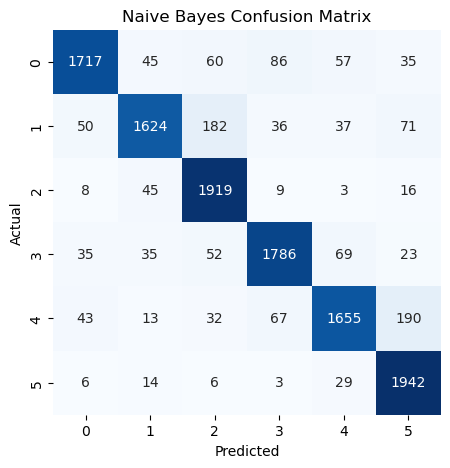

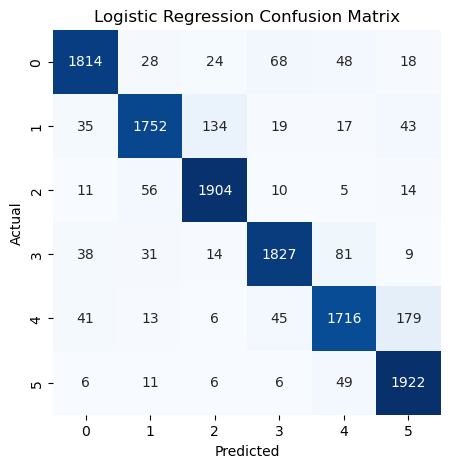

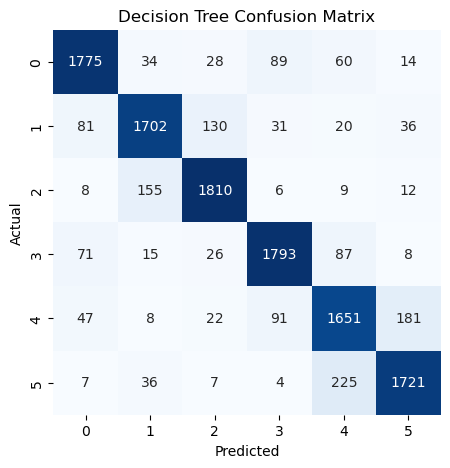

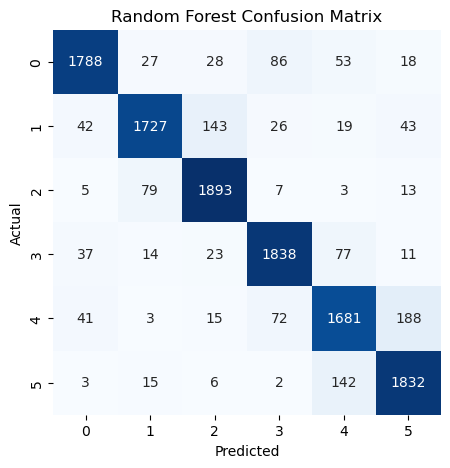

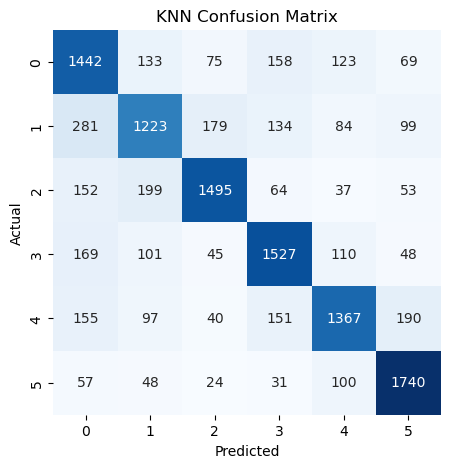

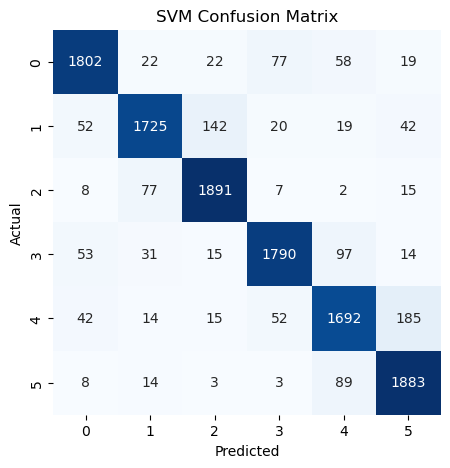

In [40]:
# Visualize results using confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(test_labels, nb_predictions, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(test_labels, lr_predictions, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(test_labels, dt_predictions, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(test_labels, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(test_labels, knn_predictions, 'KNN Confusion Matrix')
plot_confusion_matrix(test_labels, svm_predictions, 'SVM Confusion Matrix')

# Applying Term Frequency - Inverse Document Frequency(TF-IDF) technique instead of Bag of Words(BoW) (performance decreased a little)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = tfidf_vectorizer.fit_transform(train_data)

# Transform the test data
X_test_bow = tfidf_vectorizer.transform(test_data)

In [42]:
from sklearn.metrics import accuracy_score

# Task 3: Implementation of Sentiment Analysis

# Naive Bayes
nb_classifier = MultinomialNB(alpha=17)
nb_classifier.fit(X_train_bow, train_labels)
nb_predictions = nb_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, nb_predictions)
accuracy

0.8945

In [43]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=300, solver='liblinear')
lr_classifier.fit(X_train_bow, train_labels)
lr_predictions = lr_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, lr_predictions)
accuracy

0.9126666666666666

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_bow, train_labels)
dt_predictions = dt_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, dt_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8675833333333334


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_bow, train_labels)
rf_predictions = rf_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, rf_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.89525


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# k-Nearest Neighbors (k-NN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_bow, train_labels)
knn_predictions = knn_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, knn_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.39841666666666664


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, poly, etc.)
svm_classifier.fit(X_train_bow, train_labels)
svm_predictions = svm_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, svm_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9145833333333333


In [54]:
# Evaluate Naive Bayes
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')
nb_precision = precision_score(test_labels, nb_predictions, average='weighted')

In [55]:
# Evaluate Logistic Regression
lr_f1 = f1_score(test_labels, lr_predictions, average='weighted')
lr_recall = recall_score(test_labels, lr_predictions, average='weighted')
lr_precision = precision_score(test_labels, lr_predictions, average='weighted')

In [48]:
# Evaluate Decision Tree
dt_f1 = f1_score(test_labels, dt_predictions, average='weighted')
dt_recall = recall_score(test_labels, dt_predictions, average='weighted')
dt_precision = precision_score(test_labels, dt_predictions, average='weighted')

In [49]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_f1 = f1_score(test_labels, rf_predictions, average='weighted')
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')

In [50]:
# Evaluate k-NN
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')

In [51]:
# Evaluate SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')

In [52]:
# Print or store the evaluation metrics
print("Naive Bayes Metrics:")
print("F1-Score:", nb_f1)
print("Recall:", nb_recall)
print("Precision:", nb_precision)

print("\nLogistic Regression Metrics:")
print("F1-Score:", lr_f1)
print("Recall:", lr_recall)
print("Precision:", lr_precision)

# Print or store the evaluation metrics
print("\nDecision Tree Metrics:")
print("F1-Score:", dt_f1)
print("Recall:", dt_recall)
print("Precision:", dt_precision)

# Print or store the evaluation metrics
print("\nRandom Forest Metrics:")
print("F1-Score:", rf_f1)
print("Recall:", rf_recall)
print("Precision:", rf_precision)

# Print or store the evaluation metrics
print("\nk-Nearest Neighbors (k-NN) Metrics:")
print("F1-Score:", knn_f1)
print("Recall:", knn_recall)
print("Precision:", knn_precision)

# Print or store the evaluation metrics
print("\nSupport Vector Machine (SVM) Metrics:")
print("F1-Score:", svm_f1)
print("Recall:", svm_recall)
print("Precision:", svm_precision)

Naive Bayes Metrics:
F1-Score: 0.8861081430433463
Recall: 0.8869166666666667
Precision: 0.8894754865599916

Logistic Regression Metrics:
F1-Score: 0.9109766621093742
Recall: 0.91125
Precision: 0.9118886921520143

Decision Tree Metrics:
F1-Score: 0.867604580885702
Recall: 0.8675833333333334
Precision: 0.8677499968357033

Random Forest Metrics:
F1-Score: 0.8951086484606552
Recall: 0.89525
Precision: 0.8966084282352186

k-Nearest Neighbors (k-NN) Metrics:
F1-Score: 0.4160841878693603
Recall: 0.39841666666666664
Precision: 0.7510632577009071

Support Vector Machine (SVM) Metrics:
F1-Score: 0.9141155876092172
Recall: 0.9145833333333333
Precision: 0.9165752014004356


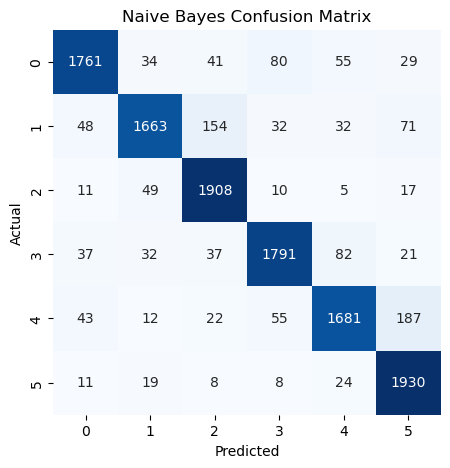

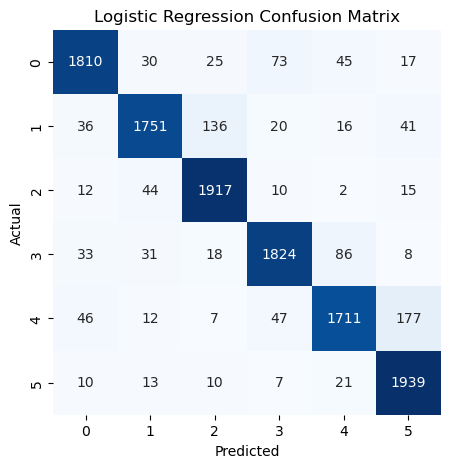

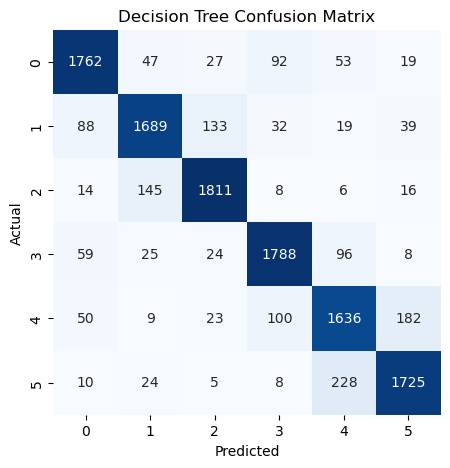

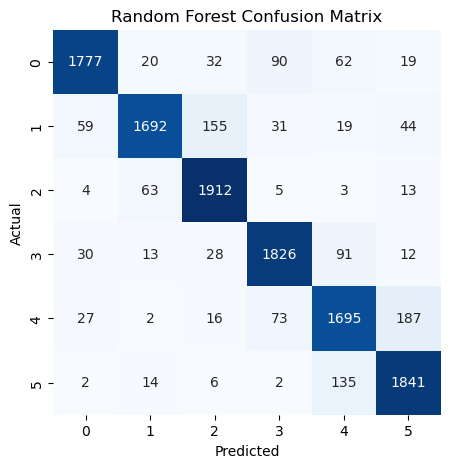

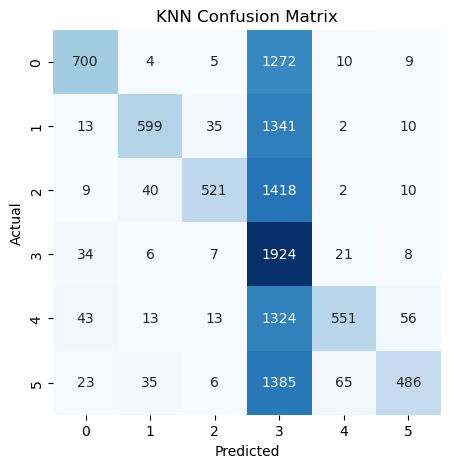

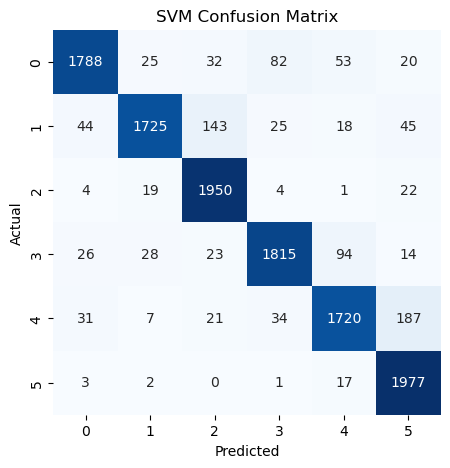

In [53]:
# Visualize results using confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(test_labels, nb_predictions, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(test_labels, lr_predictions, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(test_labels, dt_predictions, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(test_labels, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(test_labels, knn_predictions, 'KNN Confusion Matrix')
plot_confusion_matrix(test_labels, svm_predictions, 'SVM Confusion Matrix')

In [56]:
print("Unique values in true labels:", set(test_labels))
print("Unique values in predicted labels:", set(lr_predictions))

Unique values in true labels: {0, 1, 2, 3, 4, 5}
Unique values in predicted labels: {0, 1, 2, 3, 4, 5}


# Applying 10 fold cross validation on both models to get a more roboust estimate of model performance

In [59]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, nb_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.89554828 0.89516284 0.89868945 0.8969549  0.89676217]
Mean Accuracy: 0.8966235293444729


In [60]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, lr_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.915141   0.91443438 0.91783374 0.91404343 0.91892586]
Mean Accuracy: 0.9160756832149065


In [61]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, dt_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.87293634 0.86696216 0.87209302 0.86997302 0.87479121]
Mean Accuracy: 0.8713511512462645


In [62]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, rf_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90030192 0.89985225 0.9017731  0.89907491 0.90119491]
Mean Accuracy: 0.9004394172661918


In [63]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, knn_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.39179033 0.38825721 0.4043428  0.3878967  0.38648336]
Mean Accuracy: 0.3917540787930559


In [64]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(tfidf_vectorizer, svm_classifier)
cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9154622  0.9134708  0.91661313 0.91442888 0.91757677]
Mean Accuracy: 0.9155103567647528
